In [1]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load CSV and inspect
csv_path = "C:/Users/Shweta Raut/Downloads/Global Emissions/Carbon_(CO2)_Emissions_by_Country.csv"
df = pd.read_csv(csv_path)

In [3]:
print("Shape:", df.shape)

Shape: (5677, 5)


In [4]:
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [5]:
df.tail()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61
5676,Zimbabwe,Africa,01-01-2008,7600.0,0.61


In [6]:
df.head(7)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17
5,Afghanistan,Asia,01-01-2013,5990.0,0.19
6,Afghanistan,Asia,01-01-2015,5950.0,0.18


In [7]:
df.tail(7)

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5670,Zimbabwe,Africa,01-01-2003,10180.0,0.84
5671,Zimbabwe,Africa,01-01-2006,9830.0,0.80
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61
5676,Zimbabwe,Africa,01-01-2008,7600.0,0.61


#### Univariate Analysis

In [9]:
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [10]:
print("\nColumns:", list(df.columns))


Columns: ['Country', 'Region', 'Date', 'Kilotons of Co2', 'Metric Tons Per Capita']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [12]:
print("\nData types\n", df.dtypes.value_counts())


Data types
 object     3
float64    2
Name: count, dtype: int64


In [13]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 Country                   0
Region                    0
Date                      0
Kilotons of Co2           0
Metric Tons Per Capita    0
dtype: int64


In [14]:
# Dropping Duplicates
df.drop_duplicates(inplace = True)
df.shape

(5677, 5)

#### EDA & Visualizations

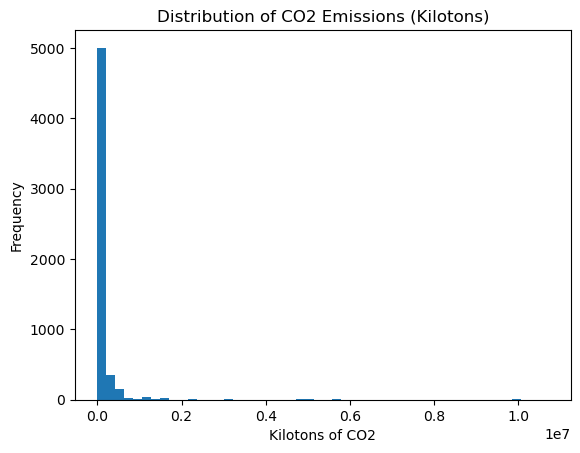

In [16]:
plt.figure()
plt.hist(df['Kilotons of Co2'], bins=50)
plt.xlabel("Kilotons of CO2")
plt.ylabel("Frequency")
plt.title("Distribution of CO2 Emissions (Kilotons)")
plt.show()


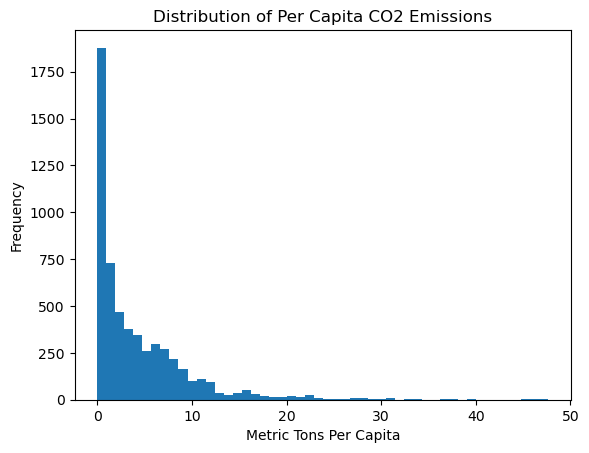

In [17]:
plt.figure()
plt.hist(df['Metric Tons Per Capita'], bins=50)
plt.xlabel("Metric Tons Per Capita")
plt.ylabel("Frequency")
plt.title("Distribution of Per Capita CO2 Emissions")
plt.show()


#### SIMPLE CORRELATION HEATMAP

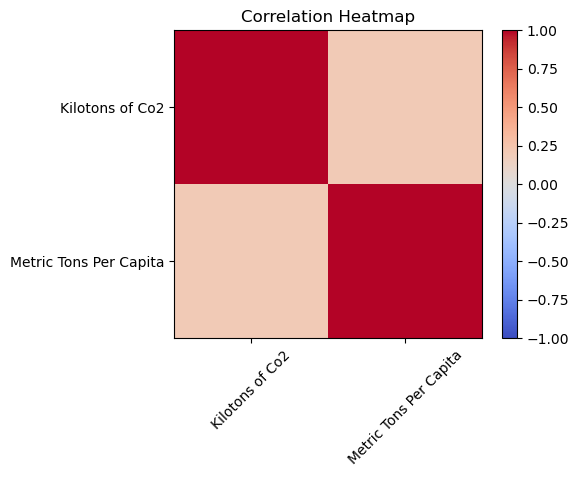

In [19]:
numeric = df[['Kilotons of Co2', 'Metric Tons Per Capita']]

plt.figure(figsize=(5,4))
plt.imshow(numeric.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks([0,1], numeric.columns, rotation=45)
plt.yticks([0,1], numeric.columns)
plt.title("Correlation Heatmap")
plt.show()


This heatmap shows the relationship between total emissions and per-capita emissions. It helps identify whether countries with high overall emissions also tend to have high per-person emissions.

#### SIMPLE OUTLIER DETECTION (IQR)

Number of outliers: 839


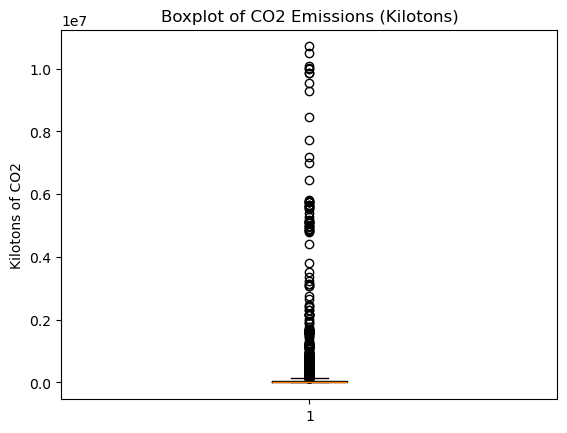

In [22]:
Q1 = df['Kilotons of Co2'].quantile(0.25)
Q3 = df['Kilotons of Co2'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['Kilotons of Co2'] < lower) | (df['Kilotons of Co2'] > upper)]

print("Number of outliers:", len(outliers))

plt.figure()
plt.boxplot(df['Kilotons of Co2'])
plt.title("Boxplot of CO2 Emissions (Kilotons)")
plt.ylabel("Kilotons of CO2")
plt.show()

This code identifies extremely high or low CO₂ values using the IQR method. The boxplot visualises the emission spread and highlights highly emitting countries as outliers.

#### SIMPLE COUNTRY TIME-SERIES PLOT

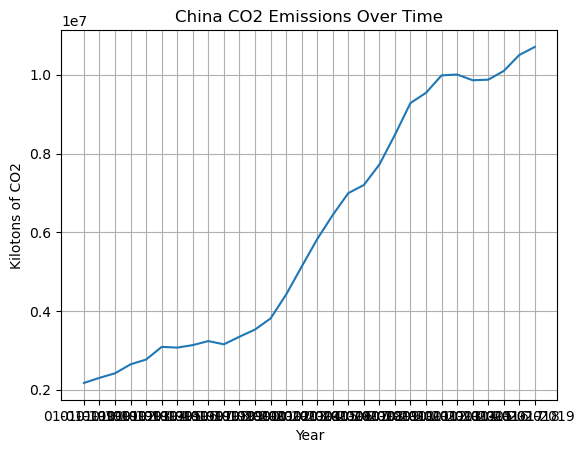

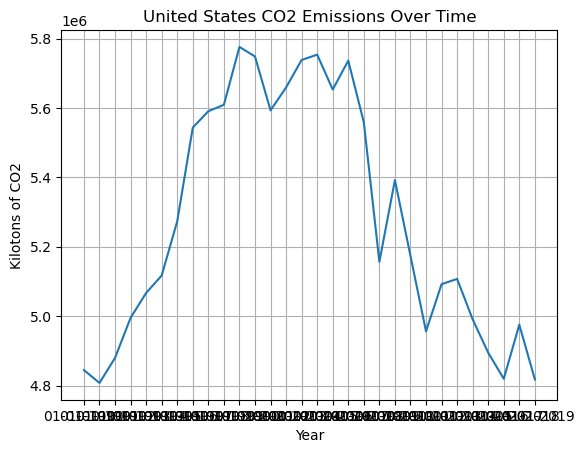

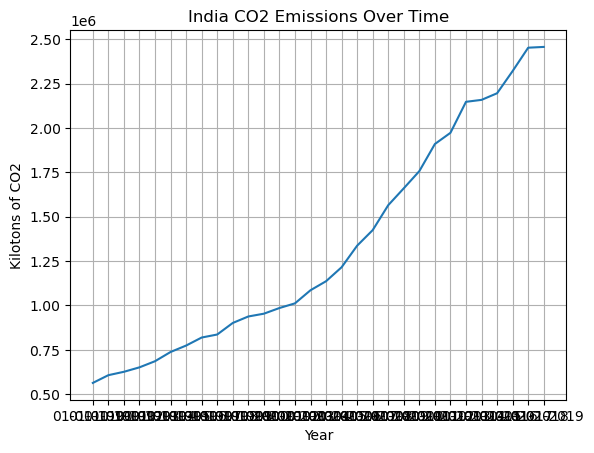

In [25]:
countries = ['China', 'United States', 'India']

for c in countries:
    sub = df[df['Country'] == c].sort_values('Date')
    plt.figure()
    plt.plot(sub['Date'], sub['Kilotons of Co2'])
    plt.title(f"{c} CO2 Emissions Over Time")
    plt.xlabel("Year")
    plt.ylabel("Kilotons of CO2")
    plt.grid(True)
    plt.show()

This plots emissions over time for selected countries. It helps compare how national CO₂ emissions have increased or decreased across different years.

In [27]:
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%Y")
df['Year'] = df['Date'].dt.year


#### SIMPLE REGION TRENDS

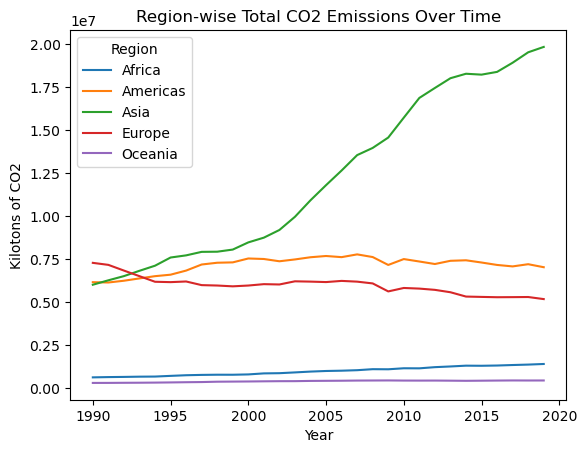

In [29]:
region_trend = df.groupby(['Year', 'Region'])['Kilotons of Co2'].sum().unstack()

region_trend.plot()
plt.title("Region-wise Total CO2 Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("Kilotons of CO2")
plt.show()

Here, emissions are grouped by region and year to show long-term regional trends. It allows easy comparison of which regions contribute most to global increases.

#### SIMPLE STACKED AREA PLOT (REGION SHARE)

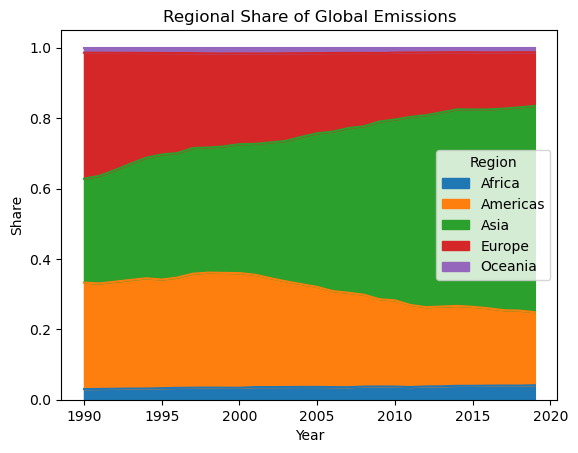

In [32]:
region_share = region_trend.div(region_trend.sum(axis=1), axis=0)

region_share.plot(kind='area', stacked=True)
plt.title("Regional Share of Global Emissions")
plt.xlabel("Year")
plt.ylabel("Share")
plt.show()

#### TOP 10 COUNTRIES BY TOTAL CO2 EMISSIONS

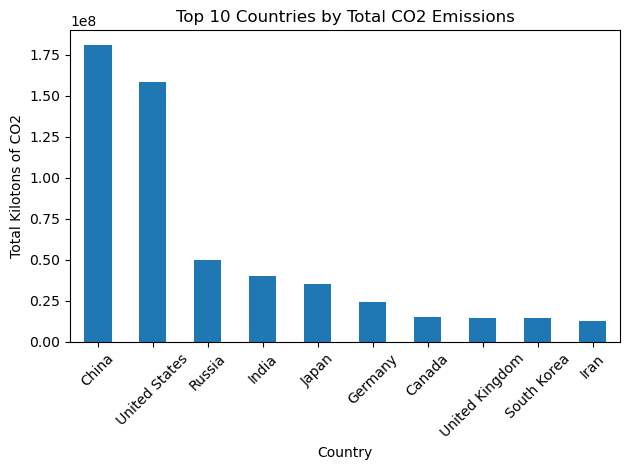

In [34]:
top10 = df.groupby('Country')['Kilotons of Co2'].sum().sort_values(ascending=False).head(10)

plt.figure()
top10.plot(kind='bar')
plt.title("Top 10 Countries by Total CO2 Emissions")
plt.xlabel("Country")
plt.ylabel("Total Kilotons of CO2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart ranks countries by their total CO₂ output. It highlights how a small number of countries are responsible for most global emissions.

#### CO2 EMISSIONS DISTRIBUTION BY REGION

<Figure size 640x480 with 0 Axes>

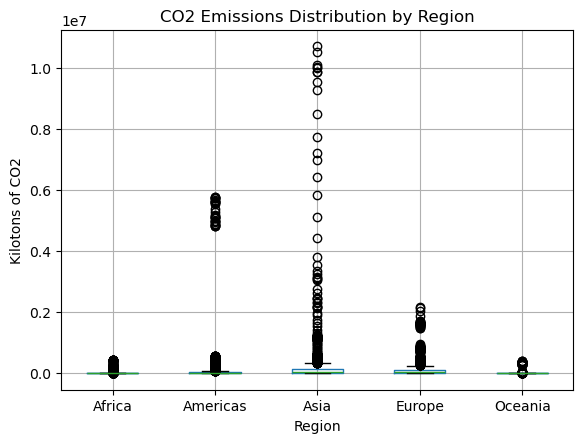

In [37]:
plt.figure()
df.boxplot(column='Kilotons of Co2', by='Region')
plt.title("CO2 Emissions Distribution by Region")
plt.suptitle("")   # removes extra title
plt.xlabel("Region")
plt.ylabel("Kilotons of CO2")
plt.show()

This boxplot compares emission ranges across regions. It shows variations within each region and identifies regions with very high or low emission spread.

#### SUMMARY
This exploratory data analysis (EDA) provides an overview of global CO₂ emissions across countries, regions, and years. The dataset includes total emissions, per-capita emissions, and dates, allowing both cross-sectional and time-series analysis. The visuals reveal strong regional differences, significant outliers, and clear trends over time.

#### KEY INSIGHTS
Here are the main findings from the visual analysis:
1. Emissions are extremely skewed
- A few countries (China, USA, India, Russia) account for the majority of global emissions.

2. Strong positive relationship
- Total emissions and per-capita emissions are correlated, meaning high emitters often have high per-person footprints.

3. Asia dominates
- Asia has the largest emissions with significant year-on-year growth, driven primarily by China and India.

4. Regional trends differ
- Europe shows stabilisation and slight decline.
- Americas rise then stabilise.
- Africa remains low but gradually increasing.

5. Outliers reveal major contributors
- Boxplots show many extreme high values from Asia and North America.

6. Time-series patterns
- China and India show upward growth; the USA shows emissions peaking and then slowly decreasing due to policy and energy transition.

#### CONCLUSION
Overall, the EDA shows that global CO₂ emissions are highly unevenly distributed across countries and regions. A small group of large, industrialised economies contribute disproportionately to global emissions, while many developing regions contribute relatively little. The trend analysis demonstrates that Asia is the main driver of recent global increases, although some regions such as Europe show stabilisation or decline.

These observations highlight the complex challenge of reducing global carbon emissions: policy efforts must target the largest emitters while supporting lower-emitting regions as they grow. Understanding these patterns is essential for designing effective climate strategies and international agreements.